In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Cinemática Inversa (I.K.)

**Parámetros**

In [27]:
#Xp = int(input("Introduza el valor de Xp: "))
#Yp = int(input("Introduza el valor de Yp: "))
Xp = 291.421
Yp = 91.421
Zp = 80

**Hallamos Theta 1**

In [28]:
theta1 = np.arctan(Yp/Xp)
print("Theta 1: ", theta1.round(5), "rads")

Theta 1:  0.30398 rads


**Hallamos Theta 3**

In [29]:
P1_x = np.sqrt(Xp**2 + Yp**2)
print("P1_X: ", P1_x.round(3))
P1_z = Zp
print("P1_z: ", P1_z)
P = np.sqrt( (P1_x**2) + (P1_z**2) )
print("Punto P: ", P.round(3))

a2 = 200
a3 = 150

P1_X:  305.424
P1_z:  80
Punto P:  315.728


Despejando Theta 3 de nuestra ecuacion

In [30]:
#from sympy.solvers import solve
#from math import atan, pi, cos, sin, acos, asin

#theta3 = np.arccos( (P1_x**2 + P1_z**2 - a2**2 - a3**2)/(2*a2*a3) )
#print(theta3)

#Theta_3 = acos( (P1_x**2 + P1_z**2 - a2**2 - a3**2)/(2*a2*a3) ) 
#print(Theta_3)


D = (P1_x**2 + P1_z**2 - a2**2 - a3**2)/(2*a2*a3)
theta3_1 = np.arctan( np.sqrt(1-D**2)/D )
theta3_2 = np.arctan( -np.sqrt(1-D**2)/D )

print("Theta 3_1: ", theta3_1.round(4), "rads" )
print("Theta 3_2: ", theta3_2.round(4), "rads" )
#solve(x**2 - 1, x)

Theta 3_1:  0.9024 rads
Theta 3_2:  -0.9024 rads


**Hallamos Theta 2**

In [31]:
theta2_1 = np.arccos( (P1_x**2 + P1_z**2 + a2**2 - a3**2)/(2*a2*np.sqrt( (P1_x**2) + (P1_z**2) ) ) ) + np.arctan(P1_z/P1_x)
theta2_2 = -np.arccos( (P1_x**2 + P1_z**2 + a2**2 - a3**2)/(2*a2*np.sqrt( (P1_x**2) + (P1_z**2) ) ) ) + np.arctan(P1_z/P1_x)

print("Theta 2_1: ", theta2_1.round(3), "rads")
#print("Theta 2_2: ", theta2_2.round(3), "rads")

Theta 2_1:  0.638 rads


Conversion Radianes a Grados

In [32]:
tetha1Deg = (theta1*180)/np.pi

tetha2Deg = (theta2_1*180)/np.pi

tetha3Deg = (theta3_2*180)/np.pi


print("tetha 1: ", tetha1Deg.round(3), "°")
print("tetha 2: ", tetha2Deg.round(3), "°")
print("tetha 3: ", tetha3Deg.round(3), "°")


tetha 1:  17.417 °
tetha 2:  36.57 °
tetha 3:  -51.703 °


Una vez calculamos los ángulos theta 1, theta 2 y theta 3; procedemos al método de Cinemática Directa

# Cinemática Directa (D.K.)

In [33]:
a1 = 50
a2 = 200
a3 = 150

b1 = 0
b2 = 0
b3 = 0

alpha1 = 0
alpha2 = 0
alpha3 = 0

Conversion Grados a Radianes

In [34]:
tetha1R = (tetha1Deg*np.pi)/180
alpha1R = (alpha1*np.pi)/180

tetha2R = (tetha2Deg*np.pi)/180
alpha2R = (alpha2*np.pi)/180

tetha3R = (tetha3Deg*np.pi)/180
alpha3R = (alpha3*np.pi)/180

print("tetha 1: {} rads\nalpha 1: {} rads".format(tetha1R.round(3), alpha1R) )
print("\ntetha 2: {} rads\nalpha 2: {} rads".format(tetha2R.round(3), alpha2R) )
print("\ntetha 3: {} rads\nalpha 3: {} rads".format(tetha3R.round(4), alpha3R) )


tetha 1: 0.304 rads
alpha 1: 0.0 rads

tetha 2: 0.638 rads
alpha 2: 0.0 rads

tetha 3: -0.9024 rads
alpha 3: 0.0 rads


Matrices de Transformacion Homegenea

In [35]:
# Parametros b ( desplazamiento en el eje Z )

Tb1 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b1],
      [0, 0, 0, 1]]

Tb2 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b2],
      [0, 0, 0, 1]]

Tb3 = [[1, 0, 0, 0],
      [0, 1, 0, 0],
      [0, 0, 1, b3],
      [0, 0, 0, 1]]

In [36]:
# Parametros Tetha ( Rotacion en el eje Z )

Ttetha1 = [[np.cos(tetha1R), -np.sin(tetha1R), 0, 0],
          [np.sin(tetha1R), np.cos(tetha1R), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]

Ttetha2 = [[np.cos(tetha2R), -np.sin(tetha2R), 0, 0],
          [np.sin(tetha2R), np.cos(tetha2R), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]
Ttetha3 = [[np.cos(tetha3R), -np.sin(tetha3R), 0, 0],
          [np.sin(tetha3R), np.cos(tetha3R), 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]

print("Ttetha1:\n", np.matrix(Ttetha1).round(3) )
print("\nTtetha2:\n", np.matrix(Ttetha2).round(3) )
print("\nTtetha3:\n", np.matrix(Ttetha3).round(3) )

Ttetha1:
 [[ 0.954 -0.299  0.     0.   ]
 [ 0.299  0.954  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]

Ttetha2:
 [[ 0.803 -0.596  0.     0.   ]
 [ 0.596  0.803  0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]

Ttetha3:
 [[ 0.62   0.785  0.     0.   ]
 [-0.785  0.62   0.     0.   ]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


In [37]:
# Parametros a ( desplazamiento del eslabon en el eje X  )

Ta1 = [[1, 0, 0, a1],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

Ta2 = [[1, 0, 0, a2],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

Ta3 = [[1, 0, 0, a3],
      [0, 1, 0, 0],
      [0, 0, 1, 0],
      [0, 0, 0, 1]]

In [38]:
Talpha1 = [[1, 0, 0, 0],
         [0, np.cos(alpha1R), -np.sin(alpha1R), 0],
          [0, np.sin(alpha1R), np.cos(alpha1R), 0],
          [0, 0, 0, 1]]

Talpha2 = [[1, 0, 0, 0],
         [0, np.cos(alpha2R), -np.sin(alpha2R), 0],
          [0, np.sin(alpha2R), np.cos(alpha2R), 0],
          [0, 0, 0, 1]]

Talpha3 = [[1, 0, 0, 0],
         [0, np.cos(alpha3R), -np.sin(alpha3R), 0],
          [0, np.sin(alpha3R), np.cos(alpha3R), 0],
          [0, 0, 0, 1]]

print("Talpha1:\n", np.matrix(Talpha1) )
print("\nTalpha2:\n", np.matrix(Talpha2) )
print("\nTalpha3:\n", np.matrix(Talpha3).round(3) )

Talpha1:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Talpha2:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

Talpha3:
 [[ 1.  0.  0.  0.]
 [ 0.  1. -0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]


In [39]:
#T1_1 = np.dot(Tb1, Ttetha1)
#T1_2 = np.dot(T1_1, Ta1)
#T1_a_0 = np.dot(T1_2, Talpha1)

T1_a_0 = np.dot(np.dot(np.dot(Tb1, Ttetha1), Ta1), Talpha1)

print("\nMatriz de Transformacion T1 -> 0 (TL1): (a1 = {} mm, b1 = {}, tetha1 = {}°, alpha1 = {}°)\n\n" .format(a1, b1, tetha1R.round(3), alpha1R), np.matrix(T1_a_0).round(3) )


Matriz de Transformacion T1 -> 0 (TL1): (a1 = 50 mm, b1 = 0, tetha1 = 0.304°, alpha1 = 0.0°)

 [[ 0.954 -0.299  0.    47.708]
 [ 0.299  0.954  0.    14.966]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


In [40]:
#T2_1 = np.dot(Tb2, Ttetha2)
#T2_2 = np.dot(T2_1, Ta2)

T2_a_1 = np.dot(np.dot(np.dot(Tb2, Ttetha2), Ta2), Talpha2)

print("\nMatriz de Transformacion T2 -> 1 (TL2): (a2 = {} mm, b2 = {}, tetha2 = {}°, alpha2 = {}°)\n\n".format(a2, b2, tetha2R.round(3), alpha2R), np.matrix(T2_a_1).round(3) )


Matriz de Transformacion T2 -> 1 (TL2): (a2 = 200 mm, b2 = 0, tetha2 = 0.638°, alpha2 = 0.0°)

 [[  0.803  -0.596   0.    160.626]
 [  0.596   0.803   0.    119.16 ]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]


In [41]:
#T3_1 = np.dot(Tb3, Ttetha3)
#T3_2 = np.dot(T3_1, Ta3)

T3_a_2 = np.dot(np.dot(np.dot(Tb3, Ttetha3), Ta3), Talpha3)

print("\nMatriz de Transformacion T3 -> 2 (TL3): (a3 = {} mm, b3 = {}, tetha3 = {}°, alpha3 = {}°)\n\n".format(a3, b3, tetha3R.round(3), alpha3R), np.matrix(T3_a_2).round(3)  )


Matriz de Transformacion T3 -> 2 (TL3): (a3 = 150 mm, b3 = 0, tetha3 = -0.902°, alpha3 = 0.0°)

 [[   0.62     0.785    0.      92.96 ]
 [  -0.785    0.62     0.    -117.722]
 [   0.       0.       1.       0.   ]
 [   0.       0.       0.       1.   ]]


In [42]:
T10_21 = np.dot(T1_a_0, T2_a_1)
Tfinal = np.dot(np.dot(T1_a_0, T2_a_1), T3_a_2) 

print("\nMatriz de Transformacion TF (0 -> 3):\n\n", np.matrix(Tfinal).round(3) )


Matriz de Transformacion TF (0 -> 3):

 [[ 9.99000e-01 -4.00000e-02  0.00000e+00  3.15183e+02]
 [ 4.00000e-02  9.99000e-01  0.00000e+00  1.82719e+02]
 [ 0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]


Matriz DH

In [43]:
print("\nMatriz de Transformacion Final (P3):\n", Tfinal.round(3))

P2 = np.dot(T1_a_0, T2_a_1)
print("\nMatriz de Transformacion Parcial (P2):\n", P2.round(3))

P2_1 = np.dot(Tfinal,  np.linalg.inv(T3_a_2) )
print("\nMatriz de Transformacion Parcial (P2):\n", P2_1.round(3))

P1 = np.dot( P2, np.linalg.inv(T2_a_1) )
print("\nMatriz de Transformacion Parcial 1 (P1):\n", P1.round(3))



Matriz de Transformacion Final (P3):
 [[ 9.99000e-01 -4.00000e-02  0.00000e+00  3.15183e+02]
 [ 4.00000e-02  9.99000e-01  0.00000e+00  1.82719e+02]
 [ 0.00000e+00  0.00000e+00  1.00000e+00  0.00000e+00]
 [ 0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00]]

Matriz de Transformacion Parcial (P2):
 [[  0.588  -0.809   0.    165.302]
 [  0.809   0.588   0.    176.743]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]

Matriz de Transformacion Parcial (P2):
 [[  0.588  -0.809   0.    165.302]
 [  0.809   0.588   0.    176.743]
 [  0.      0.      1.      0.   ]
 [  0.      0.      0.      1.   ]]

Matriz de Transformacion Parcial 1 (P1):
 [[ 0.954 -0.299  0.    47.708]
 [ 0.299  0.954  0.    14.966]
 [ 0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]


In [44]:
print("======== P3 ========")
xJ3 = Tfinal[0,3]
yJ3 = Tfinal[1,3]
print("xJ3:", xJ3.round(3))
print("yJ3:", yJ3.round(3))

print("======== P2 ========")
xJ2 = P2[0,3]
yJ2 = P2[1,3]
print("\nxJ2:", xJ2.round(3))
print("yJ2:", yJ2.round(3))

print("======== P1 ========")
xJ1 = P1[0,3]
yJ1 = P1[1,3]
print("\nxJ1:", xJ1.round(3))
print("yJ1:", xJ1.round(3))

======== P3 ========
xJ3: 315.183
yJ3: 182.719
======== P2 ========

xJ2: 165.302
yJ2: 176.743
======== P1 ========

xJ1: 47.708
yJ1: 47.708


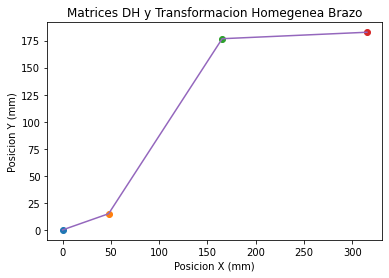

In [45]:
fix, axes = plt.subplots()
plt.plot(0,0,'o')
plt.plot(xJ1, yJ1, 'o')
plt.plot(xJ2, yJ2, 'o')
plt.plot(xJ3, yJ3, 'o')
plt.plot([0, xJ1, xJ2, xJ3], [0, yJ1, yJ2, yJ3])
plt.title("Matrices DH y Transformacion Homegenea Brazo")
plt.xlabel("Posicion X (mm)")
plt.ylabel("Posicion Y (mm)")
plt.show()